Model Accuracy: 0.78


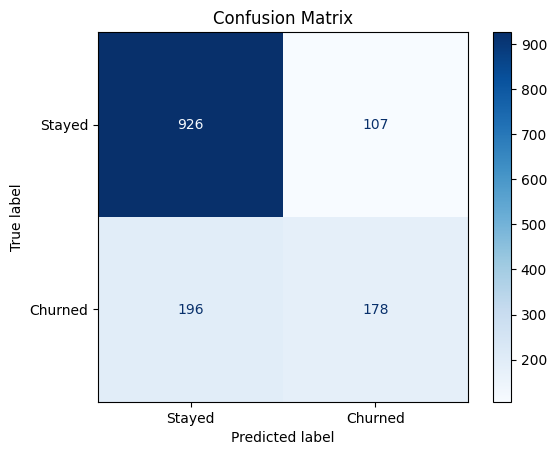

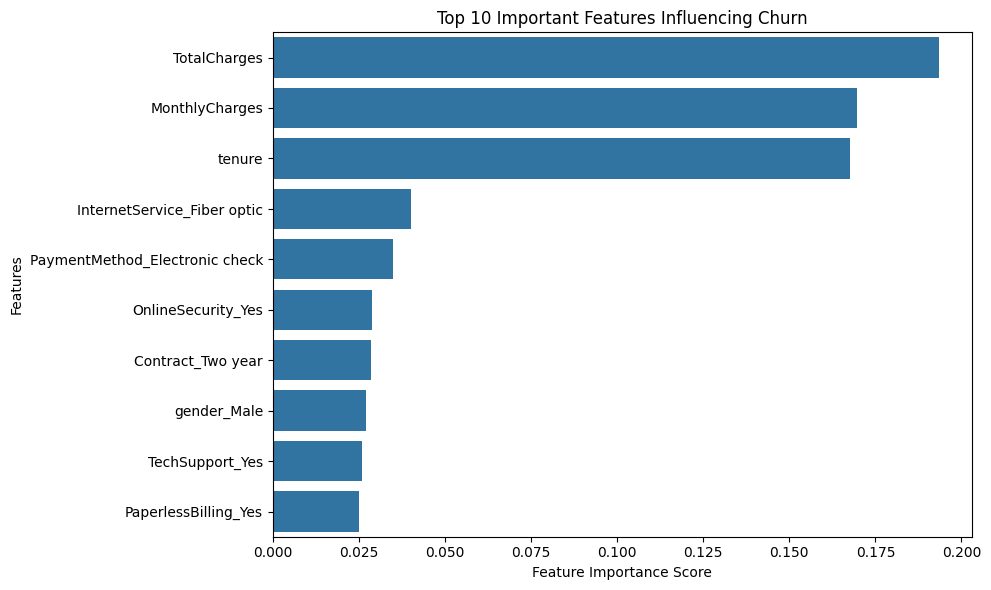

In [1]:
# Task 3: Customer Churn Prediction (Bank Customers)

# Import required libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

# Step 1: Load the dataset
df = pd.read_csv("Customer_Churn.csv")

# Step 2: Data Cleaning
df.drop('customerID', axis=1, inplace=True)  # Drop irrelevant ID column
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')  # Convert TotalCharges to float
df.dropna(inplace=True)  # Drop rows with missing values

# Step 3: Encode categorical features
# Get all object-type (categorical) columns
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
categorical_cols.remove('Churn')  # Exclude the target column

# One-hot encode all categorical features (drop_first=True avoids multicollinearity)
df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

# Label encode the target variable
df_encoded['Churn'] = df_encoded['Churn'].map({'No': 0, 'Yes': 1})

# Step 4: Prepare features and labels
X = df_encoded.drop('Churn', axis=1)
y = df_encoded['Churn']

# Step 5: Feature Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 6: Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Step 7: Train Model (Random Forest)
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Step 8: Predictions and Evaluation
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.2f}")

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=['Stayed', 'Churned'])
disp.plot(cmap='Blues')
plt.title("Confusion Matrix")
plt.show()

# Step 9: Feature Importance Analysis
importances = pd.Series(model.feature_importances_, index=X.columns)
top_features = importances.sort_values(ascending=False).head(10)

# Plot Top 10 Important Features
plt.figure(figsize=(10, 6))
sns.barplot(x=top_features.values, y=top_features.index)
plt.title("Top 10 Important Features Influencing Churn")
plt.xlabel("Feature Importance Score")
plt.ylabel("Features")
plt.tight_layout()
plt.show()
